# MIIII

In [1]:
import jax.numpy as jnp
from jax import random
import jax
from oeis import oeis
import optax
from functools import partial
from sklearn.metrics import confusion_matrix, f1_score
import src

In [2]:
def predict(apply_fn, params, x):
    return (jax.nn.sigmoid(apply_fn(params, x)) > 0.5).astype(jnp.int32)

In [3]:
# config and init
conf, (rng, key) = src.get_conf(), random.split(random.PRNGKey(0))
data = src.prime_fn(conf["n"], partial(src.base_n, conf["base"]))
params = src.init_fn(key, dict(**conf, len=data[0][0].shape[1]))

In [4]:
# train
apply_fn = src.make_apply_fn(src.vaswani_fn)
loss_fn, train_fn, opt_state = src.init_train(apply_fn, params, conf, *data)
(params, opt_state), losses = train_fn(params, opt_state, conf["epochs"])

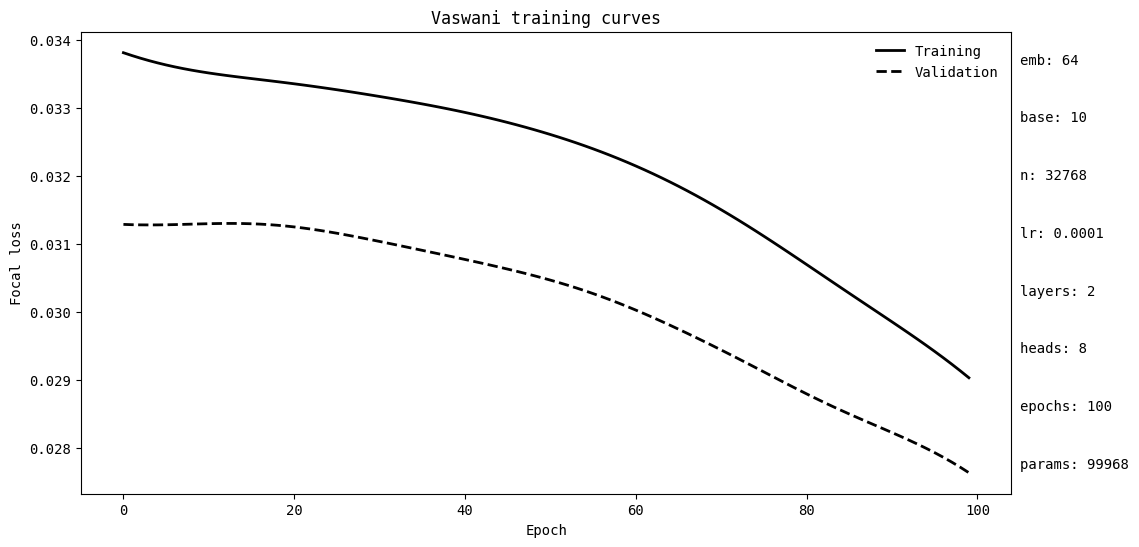

In [5]:
# evaluate
src.curve_plot(losses, conf, params)
(train_x, train_y), (test_x, test_y) = data
train_pred = predict(apply_fn, params, train_x)
valid_pred = predict(apply_fn, params, test_x)

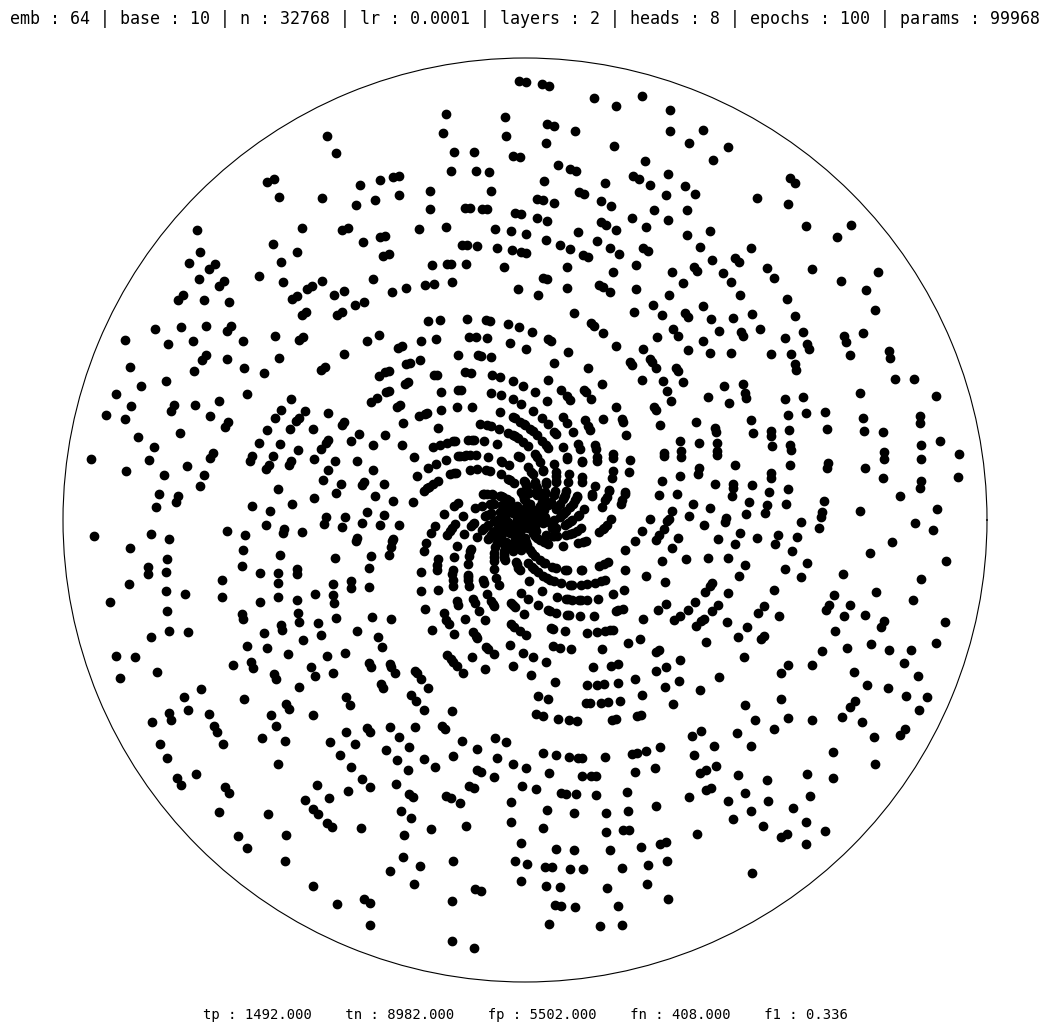

In [6]:
con_mat = confusion_matrix(train_y, train_pred)
confusion = {
    "tp": con_mat[1, 1],
    "tn": con_mat[0, 0],
    "fp": con_mat[0, 1],
    "fn": con_mat[1, 0],
}
info = dict(**confusion, f1=f1_score(train_y, train_pred))
src.polar_plot((train_pred + train_y == 2).astype(jnp.int32), conf, info, "trained")

In [7]:
1 - ((train_x.shape[0] / jnp.log(train_x.shape[0])) / train_x.shape[0])

Array(0.89695036, dtype=float32, weak_type=True)